In [1]:
import cPickle
with open('./data/express/pretrain_db_benchmark/namelist.pkl', 'rb') as fid:
    namelist = cPickle.load(fid)
with open('./data/express/pretrain_db_benchmark/info.pkl', 'rb') as fid:
    info = cPickle.load(fid)
    
w_list = []
h_list = []
for name in namelist:
    item = info[name]
    _,_,w,h = item[1]
    imw, imh = item[2]
    ratio = max(imw/1300., imh/650.)
    w = w/ratio/1300
    h = h/ratio/650
    w_list.append(w)
    h_list.append(h)

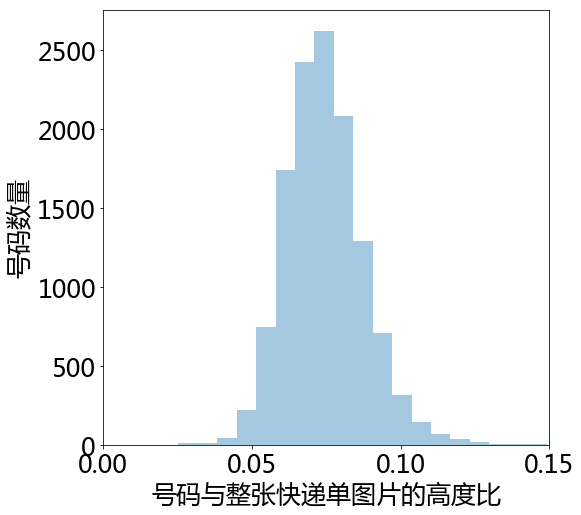

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 25})
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

# fig, (ax1, ax2) = plt.subplots(1,1,figsize=(8,15))
# a = sns.distplot(w_list, kde=False, ax=ax1)
# # a.set(xlabel='width ratio between phone number and waybill image', ylabel='number of phone numbers')
# a.set(xlabel=u'号码与整张快递单图片的宽度比', ylabel=u'号码数量')
# a.set_xlim(0,0.3)
# b = sns.distplot(h_list, kde=False, ax=ax2)
# # b.set(xlabel='height ratio between phone number and waybill image', ylabel='number of phone numbers')
# b.set(xlabel='号码与整张快递单图片的高度比', ylabel='号码数量')
# b.set_xlim(0,0.15)

fig, ax1 = plt.subplots(1,1,figsize=(8,8))
# a = sns.distplot(w_list, kde=False, ax=ax1)
# a.set(xlabel=u'号码与整张快递单图片的宽度比', ylabel=u'号码数量')
# a.set_xlim(0,0.3)
b = sns.distplot(h_list, kde=False, ax=ax1)
b.set(xlabel=u'号码与整张快递单图片的高度比', ylabel=u'号码数量')
b.set_xlim(0,0.15)
plt.savefig('./temp_pic/00.png',bbox_inches='tight', pad_inches = 0)

In [30]:
import cPickle
with open('./data/express/pretrain_db_benchmark/namelist.pkl', 'rb') as fid:
    namelist = cPickle.load(fid)
with open('./data/express/pretrain_db_benchmark/info.pkl', 'rb') as fid:
    info = cPickle.load(fid)

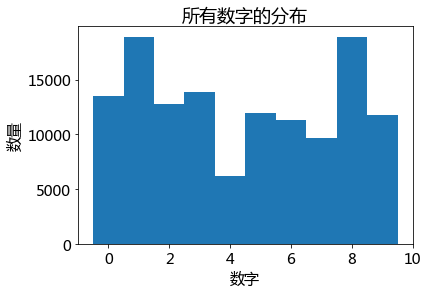

In [22]:
res = []
for i in range(len(namelist)):
    phone = info[namelist[i]][0]
    for j in range(phone.shape[0]):
        res.append(phone[j])
bins = range(11)
bins = [item-.5 for item in bins]

fig, ax = plt.subplots(1)
ax.hist(res, bins=bins)
ax.set_title(u'所有数字的分布')
ax.set_xlabel(u'数字')
ax.set_ylabel(u'数量')
plt.savefig('./temp_pic/01.png',bbox_inches='tight', pad_inches = 0)

In [25]:
# res = [[0]*10 for _ in range(12)]

# for i in range(len(namelist)):
#     phone = info[namelist[i]][0]
#     for j in range(phone.shape[0]):
#         res[j][phone[j]] += 1
# res
import pandas as pd
res = [[] for _ in range(12)]
for i in range(len(namelist)):
    phone = info[namelist[i]][0]
    for j in range(phone.shape[0]):
        res[j].append(phone[j])

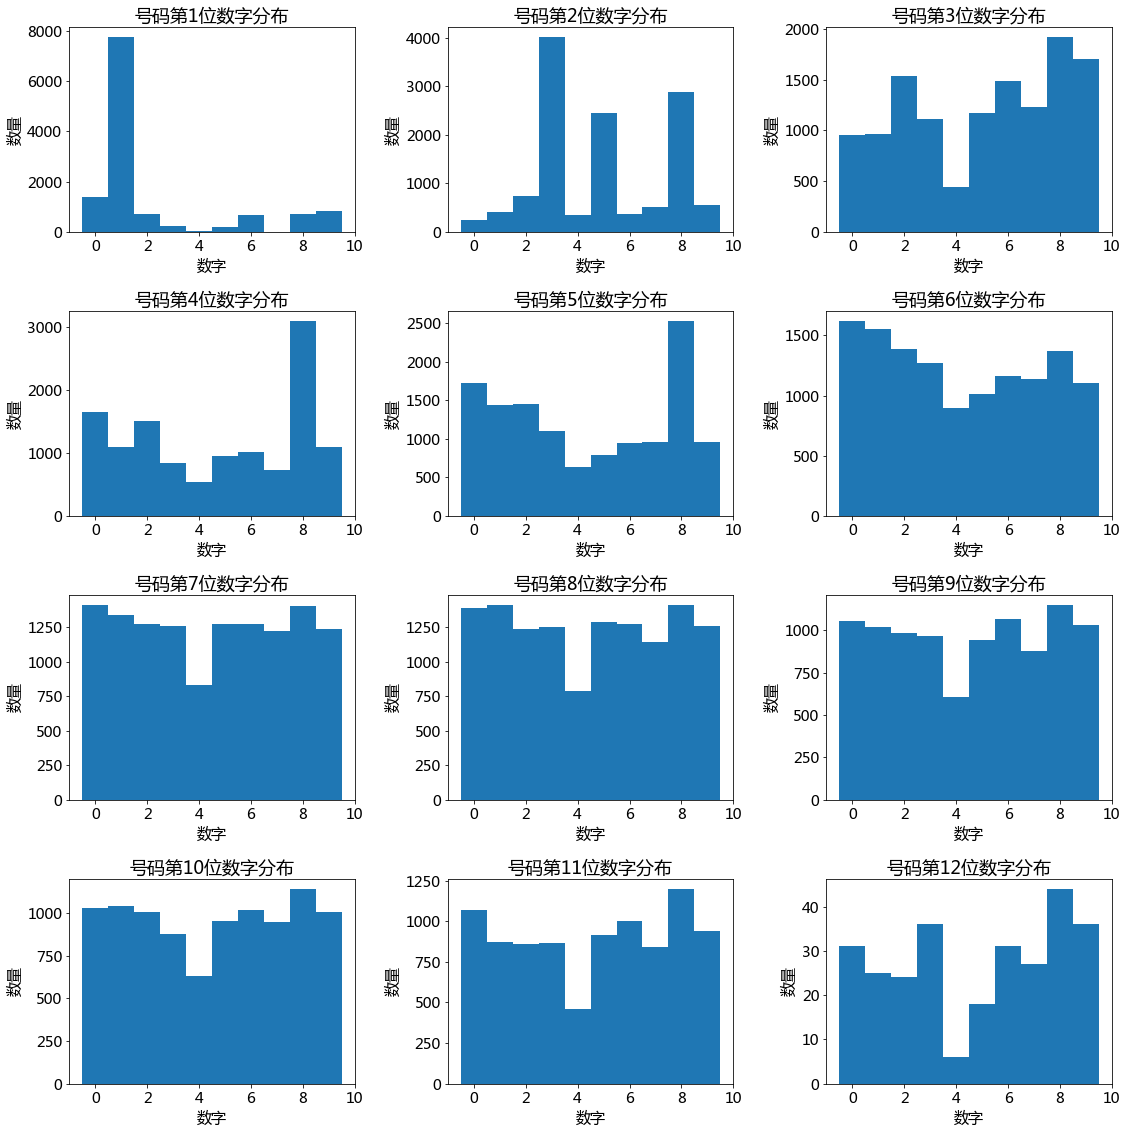

In [26]:
matplotlib.rcParams.update({'font.size': 15})
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

# fig, axes = plt.subplots(6,2,figsize=(16,16))
# for i in range(12):
#     sns.distplot(res[i], kde=False, ax=axes[i/2, i%2], hist_kws={"rwidth":0.5,'edgecolor':'black', 'alpha':1.0})
# for i in range(12):
#     axes[i/2, i%2].bar(range(len(res[i])),res[i],width=1)

bins = range(11)
bins = [item-.5 for item in bins]

fig, axes = plt.subplots(4,3,figsize=(16,16))
for i in range(12):
    x,y = i/3,i%3
    axes[x,y].hist(res[i], bins=bins)
    axes[x,y].set_title(u'号码第{}位数字分布'.format(i+1))
    axes[x,y].set_xlabel(u'数字')
    axes[x,y].set_ylabel(u'数量')
plt.tight_layout()
plt.savefig('./temp_pic/00.png',bbox_inches='tight', pad_inches = 0)
plt.show()

In [42]:

## test gt_roidb
## test det
import cPickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import os

with open('./data/express/pretrain_db_benchmark/namelist.pkl', 'rb') as fid:
    namelist = cPickle.load(fid)
with open('data/cache/phone_test_gt_roidb.pkl', 'rb') as fid:
    gt_roidb = cPickle.load(fid)
with open('output/phone_test/phone_24000.h5/detection_score.pkl', 'rb') as fid:
    det = cPickle.load(fid)

image name:  132817888794_1.jpg
labels:  [1 5 8 1 5 5 5 2 1 1 3]


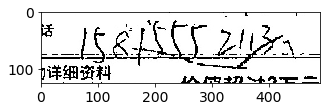

pred:  [1 5 8 1 5 5 5 2 1 1 3]


In [58]:
index = 5
im = np.array(Image.open(os.path.join('data/express/pretrain_db_benchmark/images/',gt_roidb[index]['image'])))
print 'image name: ', gt_roidb[index]['image']
print 'labels: ', gt_roidb[index]['labels']
fig, ax = plt.subplots(1)
ax.imshow(im, cmap='gray')
# plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = [5,3]
plt.show()

score = np.vstack(det[index][:12])
length = det[index][-1]
# print length
print 'pred: ', np.argmax(score, axis=1)[:np.argmax(length)+5]

In [1]:
import cPickle
with open('./output/phone_test/phone_16000.h5/phone_right_list.pkl', 'rb') as fid:
    right_list1 = cPickle.load(fid)
with open('./output/phone_test/phone_16000.h5/detection_phone.pkl', 'rb') as fid:
    res_all1 = cPickle.load(fid)
with open('./output/phone_test/phone_20000.h5/phone_right_list.pkl', 'rb') as fid:
    right_list2 = cPickle.load(fid)
with open('./output/phone_test/phone_20000.h5/detection_phone.pkl', 'rb') as fid:
    res_all2 = cPickle.load(fid)
with open('data/cache/phone_test_gt_roidb.pkl', 'rb') as fid:
    gt_roidb = cPickle.load(fid)
    
rectified_list = list(set(right_list2) - set(right_list1))

In [2]:
res_all2[2]

[[1, 3, 8, 8, 0, 8, 8, 2, 5, 4, 4]]

image name:  308832162749_1.jpg
labels:  [0 7 5 6 2 6 6 2 9 4 3]
pred1:  [[0, 7, 5, 6, 2, 6, 2, 2, 9, 4, 3]]
pred2:  [[0, 7, 5, 6, 2, 6, 6, 2, 9, 4, 3]]


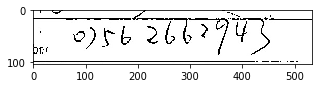

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import os

index = 17
im = np.array(Image.open(os.path.join('data/express/test_db_benchmark/images/',gt_roidb[rectified_list[index]]['image'])))
print 'image name: ', gt_roidb[rectified_list[index]]['image']
print 'labels: ', gt_roidb[rectified_list[index]]['labels']
print 'pred1: ', res_all1[rectified_list[index]]
print 'pred2: ', res_all2[rectified_list[index]]

fig, ax = plt.subplots(1)
ax.imshow(im, cmap='gray')
plt.rcParams["figure.figsize"] = [5,3]
plt.show()

In [40]:
with open('./output/test_all/phone_all.pkl', 'rb') as fid:
    phone_all, score_all = cPickle.load(fid)
with open('./output/test_all/namelist.pkl', 'rb') as fid:
    namelist = cPickle.load(fid)
with open('./output/test_all/info.pkl', 'rb') as fid:
    info = cPickle.load(fid)

In [43]:
phone_all

2816

In [42]:
with open('./temp/temp.pkl', 'rb') as fid:
    temp = cPickle.load(fid)
len(set(namelist))

1400

In [50]:
with open('data/cache/express_test_gt_roidb.pkl', 'rb') as fid:
    gt_roidb = cPickle.load(fid)
print len(gt_roidb)
a = []
for i in range(len(gt_roidb)):
    a.append(gt_roidb[i]['image'].split('_')[0])
len(a)

1400


1400

In [56]:
res = [1,2,3]
''.join([str(i) for i in res])

'123'

In [73]:
def voteclassifier(res_list, score_list):
    # res_list: [[1,2,3], [...], ...]
    d = {}
    for res, score in zip(res_list, score_list):
        res = ''.join([str(i) for i in res])
        if res in d:
            d[res].append(score)
        else:
            d[res] = [score]
    res, maxinum, score = '', 0, None
    for k,v in d.items():
        if len(v) > maxinum:
            maxinum = len(v)
            res = k
            score = np.mean(v)
    return np.array([int(i) for i in list(res)]), score

voteclassifier([np.array([1,2,3]),np.array([1,2,3]),np.array([1,2])], [1,2,3])

(array([1, 2, 3]), 1.5)

In [65]:
zip([[1,2,3],[1,2,3],[1,2]], [1,2,3])

[([1, 2, 3], 1), ([1, 2, 3], 2), ([1, 2], 3)]

In [70]:
[int(i) for i in list('123')]

[1, 2, 3]

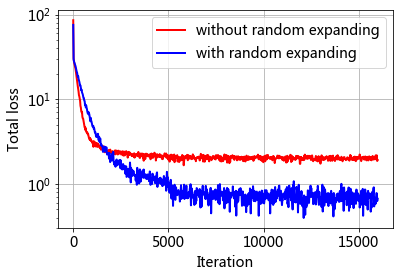

In [8]:
import pandas
import matplotlib.pyplot as plt
import random 
import numpy as np
import matplotlib
a = pandas.read_csv('./output/log.csv')[:800]
b = pandas.read_csv('./output/log1.csv')[:800]

plt.figure()
plt.rcParams["figure.figsize"] = [8,5]
matplotlib.rcParams.update({'font.size': 14})
# plt.title('title here')
plt.xlabel('Iteration')
plt.ylabel('Total loss')
plt.yscale('log')
plt.grid(True)


plt.plot(a['iteration'], a['train/loss'], label = 'without random expanding', color = [1,0,0], linewidth = 2)
plt.plot(b['iteration'], b['train/loss'], label = 'with random expanding', color = [0,0,1], linewidth = 2)

plt.legend(loc='upper right')
plt.show()

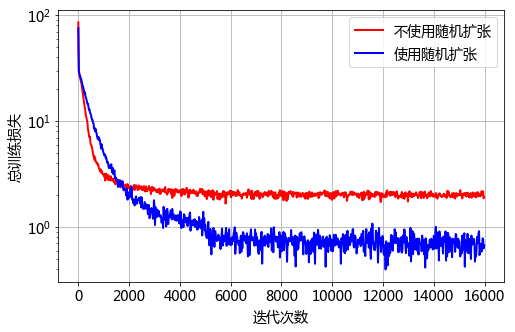

In [9]:
matplotlib.rcParams.update({'font.size': 25})
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

plt.figure()
plt.rcParams["figure.figsize"] = [8,5]
matplotlib.rcParams.update({'font.size': 14})
# plt.title('title here')
plt.xlabel(u'迭代次数')
plt.ylabel(u'总训练损失')
plt.yscale('log')
plt.grid(True)


plt.plot(a['iteration'], a['train/loss'], label = u'不使用随机扩张', color = [1,0,0], linewidth = 2)
plt.plot(b['iteration'], b['train/loss'], label = u'使用随机扩张', color = [0,0,1], linewidth = 2)

plt.legend(loc='upper right')
plt.show()

In [26]:
import cPickle
import numpy as np

with open('output/phone_test/phone_20000.h5/detection_score.pkl', 'rb') as fid:
    all_boxes = cPickle.load(fid)
a = np.log(np.vstack(all_boxes[21][0:12]))
np.set_printoptions(precision=2)
print(a)

[[-1.35e+01 -4.31e-04 -9.68e+00 -1.50e+01 -1.44e+01 -1.26e+01 -1.50e+01
  -8.02e+00 -1.16e+01 -1.06e+01 -1.50e+01]
 [-2.53e+01 -2.41e+01 -2.36e+01 -2.42e+01 -1.93e+01  0.00e+00 -2.10e+01
  -2.39e+01 -2.46e+01 -2.36e+01 -2.58e+01]
 [-2.15e+01 -7.15e-07 -1.82e+01 -1.44e+01 -1.86e+01 -1.58e+01 -2.15e+01
  -1.77e+01 -2.00e+01 -1.81e+01 -2.15e+01]
 [-1.77e+01 -3.30e+00 -1.19e+01 -1.77e+01 -3.74e-02 -1.77e+01 -1.41e+01
  -1.24e+01 -1.29e+01 -1.50e+01 -1.77e+01]
 [-1.01e+01 -9.87e+00 -1.49e+01 -8.16e+00 -4.20e-01 -1.49e+01 -1.39e+01
  -1.08e+00 -6.45e+00 -1.49e+01 -1.49e+01]
 [-9.50e+00 -7.95e+00 -1.27e+01 -4.39e+00 -1.06e+01 -1.37e+01 -1.37e+01
  -8.17e-02 -3.37e+00 -3.47e+00 -1.37e+01]
 [-1.06e+01 -1.50e+01 -1.74e+01 -5.96e-01 -1.16e+01 -1.74e+01 -1.74e+01
  -1.70e+01 -8.01e-01 -1.13e+01 -1.74e+01]
 [-1.66e+01 -1.66e+01 -1.66e+01 -1.81e+00 -1.16e+01 -1.66e+01 -8.91e+00
  -1.66e+01 -8.67e+00 -1.80e-01 -1.66e+01]
 [-1.41e+01 -2.09e+01 -2.13e+01 -2.13e+01 -1.58e+01 -2.13e+01 -2.13e+01
  -1.39e

In [38]:
c = np.log(all_boxes[21][12])
print c

[[-20.48 -24.28 -24.28 -18.04 -23.53 -24.28   0.   -20.1 ]]


In [32]:
b = np.max(a,axis=1)
print b

[-4.31e-04  0.00e+00 -7.15e-07 -3.74e-02 -4.20e-01 -8.17e-02 -5.96e-01
 -1.80e-01 -9.54e-06  0.00e+00 -1.19e-07 -1.44e-05]


In [31]:
np.argmax(a,axis=1)

array([1, 5, 1, 4, 4, 7, 3, 9, 9, 8, 6, 6])

In [42]:
np.cumsum(b)

array([-4.31e-04, -4.31e-04, -4.32e-04, -3.79e-02, -4.58e-01, -5.40e-01,
       -1.14e+00, -1.31e+00, -1.32e+00, -1.32e+00, -1.32e+00, -1.32e+00],
      dtype=float32)

In [40]:
np.cumsum(b)[4:]+c[0]

array([-20.94, -24.82, -25.42, -19.35, -24.85, -25.6 ,  -1.32, -21.42],
      dtype=float32)

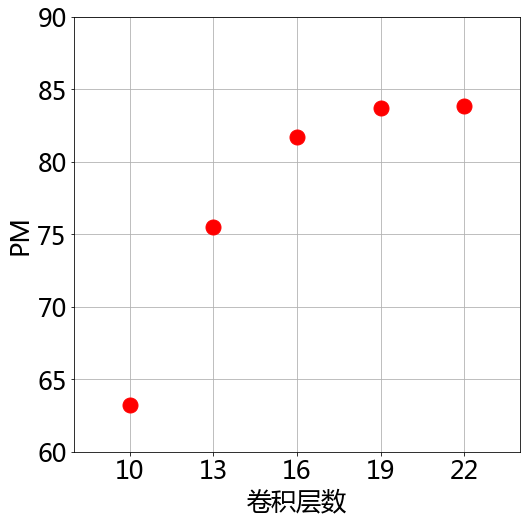

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 25})
plt.rcParams['font.sans-serif']=['Microsoft YaHei']



fig, ax1 = plt.subplots(1,1,figsize=(8,8))
x = [10,13,16,19,22]
y = [63.22, 75.52, 81.75, 83.71, 83.87]

ax1.plot(x, y, 'ro', markersize=15)
ax1.set_xticks(x)
ax1.set_ylim((60,90))
ax1.set_xlim((8,24))
ax1.set_ylabel('PM')
ax1.set_xlabel(u'卷积层数')
ax1.grid(True)

# l = plt.scatter(x, y, 10)
# plt.setp(l, markersize=10)
# plt.setp(l, markerfacecolor='C0')
# plt.ylim((60,90))
# plt.xlim((8,24))
# plt.ylabel('PM')
# plt.xlabel(u'卷积层数')
# plt.grid(True)




# plt.show()
plt.savefig('./temp_pic/00.png',bbox_inches='tight', pad_inches = 0)

In [39]:
import cPickle
with open('./data/express/pretrain_db_benchmark_extra/namelist.pkl', 'rb') as fid:
    namelist = cPickle.load(fid)
with open('./data/express/pretrain_db_benchmark_extra/info.pkl', 'rb') as fid:
    info = cPickle.load(fid)

In [67]:
res = [[] for _ in range(12)]
for i in range(len(namelist)):
    phone = info[namelist[i]][0]
    for j in range(phone.shape[0]):
        res[j].append(phone[j])

In [63]:
len(res[1])

55983

In [68]:
for i in range(9980):
    res[0].remove(1)
for i in range(2000):
    res[0].remove(8)
for i in range(1000):
    res[0].remove(3)
for i in range(4000):
    res[1].remove(3)
for i in range(1500):
    res[1].remove(5)
for i in range(6000):
    res[1].remove(8)

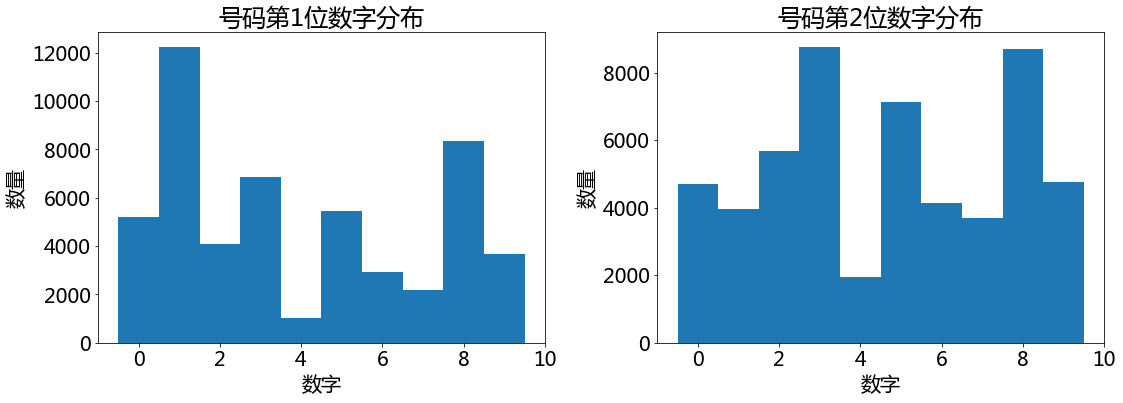

In [70]:
matplotlib.rcParams.update({'font.size': 20})
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

# fig, axes = plt.subplots(6,2,figsize=(16,16))
# for i in range(12):
#     sns.distplot(res[i], kde=False, ax=axes[i/2, i%2], hist_kws={"rwidth":0.5,'edgecolor':'black', 'alpha':1.0})
# for i in range(12):
#     axes[i/2, i%2].bar(range(len(res[i])),res[i],width=1)

bins = range(11)
bins = [item-.5 for item in bins]

fig, axes = plt.subplots(1,2,figsize=(16,6))
for i in range(2):
    x,y = i/2,i%2
    axes[y].hist(res[i], bins=bins)
    axes[y].set_title(u'号码第{}位数字分布'.format(i+1))
    axes[y].set_xlabel(u'数字')
    axes[y].set_ylabel(u'数量')
plt.tight_layout()
plt.savefig('./temp_pic/00.png',bbox_inches='tight', pad_inches = 0)
plt.show()